In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
from GUESSPy import GUESSPy

## Generate Data

In [197]:
x_score_c0=np.random.normal(0.35, 0.1, 1000)
x_score_c1=np.random.normal(0.65, 0.1, 1000)

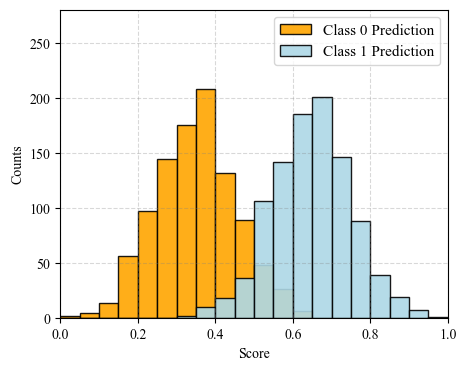

In [198]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(x_score_c0, bins=20, alpha=0.9, histtype='bar', ec='black', 
        range=[0,1], color="orange", label="Class 0 Prediction")

ax.hist(x_score_c1, bins=20, alpha=0.9, histtype='bar', ec='black', 
        range=[0,1], color="lightblue", label="Class 1 Prediction")

ax.set_xlabel("Score")
ax.set_ylabel("Counts")
ax.set_xlim([0, 1])
ax.set_ylim([0, 280])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)
#plt.savefig('syst_Res.png', dpi=600)
ax.legend(loc="upper right", fontsize=11)
#plt.savefig('statistics.png', dpi=1200)

In [199]:
classes=[0]*1000+[1]*1000
classes=np.array(classes)
x_score=np.concatenate((x_score_c0, x_score_c1), axis=0)

In [200]:
g=GUESSPy(classes, x_score, verbose=True)

###################################
Implemented fit functions
Normal
Beta
Cauchy
Expon
Gamma
InvGamma
Rayleigh
###################################
###################################
Class Probabilities:
Class 0: 0.5
Class 1: 0.5
###################################


## Get Histograms

In [201]:
binWidth, binCenters, binWeights, N_total, _=g.getBins(20, g.c_0) 

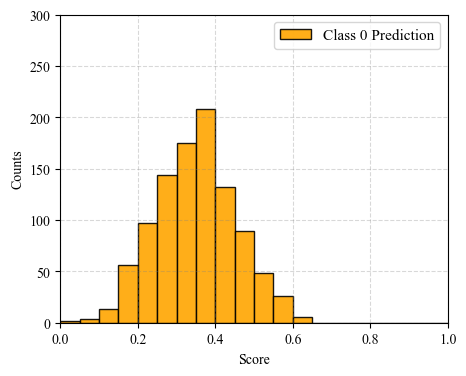

In [202]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(binCenters, bins=len(binWeights), weights=binWeights, alpha=0.9, histtype='bar', ec='black', 
        range=[0,1], color="orange", label="Class 0 Prediction")

ax.set_xlabel("Score")
ax.set_ylabel("Counts")
ax.set_xlim([0, 1])
ax.set_ylim([0, 300])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)
#plt.savefig('syst_Res.png', dpi=600)
ax.legend(loc="upper right", fontsize=11)
#plt.savefig('statistics.png', dpi=1200)

## Plot Likelihood

In [203]:
g.getBestLikelihood(c=0, N=20)

###################################
Get likelihood for class 0
###################################
Log-likelihood Values:
Normal: 844.0156275727488 ----- [0.35035000000000005, 0.1040426715343277]
Beta: -inf ----- [0.7097894756064493, 1.4906801947098711, 0.325, 0.2069429641846222]
Cauchy: 659.3167186130679 ----- [0.350976587840383, 0.06337067981961253]
Expon: 122.85375304114396 ----- [0.025, 0.32535000000000003]
Gamma: 842.6184203847174 ----- [109.98187310393746, -0.7478773042525164, 0.009981822486419135]
InvGamma: 839.4437980095902 ----- [191.93484473339424, -1.0856988564257595, 274.15210218043455]
Rayleigh: 648.7473393571636 ----- [0.024036216681489694, 0.2421833630574567]
###################################
[844.0156275727488, -inf, 659.3167186130679, 122.85375304114396, 842.6184203847174, 839.4437980095902, 648.7473393571636]
844.0156275727488
###################################
Best Fit:
PDF: Normal
Params: [0.35035000000000005, 0.1040426715343277]
Loglikelihood: 844.0156275727488


In [204]:
t=np.linspace(0,1,1000)

In [205]:
res=g.getLikelihood(t, 0)

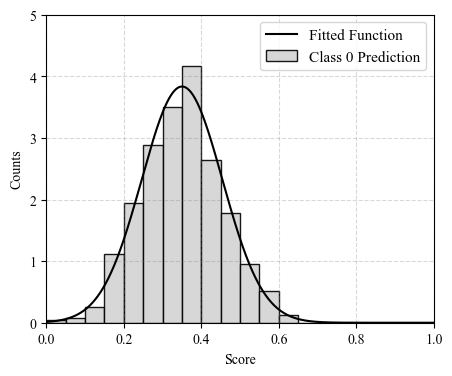

In [206]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(t, res,  color="black", label="Fitted Function")
ax.hist(binCenters, bins=len(binWeights), weights=np.array(binWeights)/N_total*20, alpha=0.9, histtype='bar', ec='black', 
        range=[0,1], color="lightgrey", label="Class 0 Prediction")
ax.set_xlabel("Score")
ax.set_ylabel("Counts")
ax.set_xlim([0, 1])
ax.set_ylim([0, 5])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)
#plt.savefig('syst_Res.png', dpi=600)
ax.legend(loc="upper right", fontsize=11)
#plt.savefig('statistics.png', dpi=1200)

## Get Calibration

In [207]:
g.getCalibration(0.5, 20)

###################################
Get likelihood for class 1
###################################
Log-likelihood Values:
Normal: 851.6337321546969 ----- [0.6480499999999999, 0.1032530750147423]
Beta: -inf ----- [443979.1120140768, 0.0032999688923545396, 0.675000000342043, 0.10086403231174657]
Cauchy: 679.2363922194152 ----- [0.6502552751239981, 0.062161595869735894]
Expon: 129.94816897796255 ----- [0.32500000000000007, 0.32304999999999984]
Gamma: 254.49983145624475 ----- [1.4819810598922007, 0.3244200891667439, 0.2953439149024747]
InvGamma: 844.9792488200294 ----- [272.05291104851483, -1.0869186637677557, 470.3524416401965]
Rayleigh: 652.586821975186 ----- [0.3240124389072947, 0.24048028869213875]
###################################
###################################
Best Fit:
PDF: Normal
Params: [0.6480499999999999, 0.1032530750147423]
Loglikelihood: 851.6337321546969
###################################
###################################
###################################
Determin

/home/jan/anaconda3/envs/mlenv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.4964811552179344, 0.5035188447820655)

## Save and load results

In [208]:
g.saveState("test.pkl")

In [209]:
g.loadState("test.pkl")

## Expected Calibration Error (ECE), Maximum Calibration Error (MCE), and Classification error (CLE)

In [210]:
g.verbose=False

### ECE

In [215]:
#
# For scores
#
e_0=g.ECE(0, 20)
e_1=g.ECE(1, 20)
print("ECE for class 0 (scores): " + str(e_0))
print("ECE for class 1 (scores): " + str(e_1))   

#
# For calibration
#
e_0=g.ECE(0, 20, True)
e_1=g.ECE(1, 20, True)
print("ECE for class 0 (calibration): " + str(e_0))
print("ECE for class 1 (calibration): " + str(e_1))   


ECE for class 0 (scores): 0.23949990548845143
ECE for class 1 (scores): 0.38494408669371755
ECE for class 0 (calibration): 0.4273765988220949
ECE for class 1 (calibration): 0.4373111687923905


### MCE

In [216]:
#
# For scores
#
e_0=g.MCE(0, 20)
e_1=g.MCE(1, 20)
print("MCE for class 0 (scores): " + str(e_0))
print("MCE for class 1 (scores): " + str(e_1))   

#
# For calibration
#
e_0=g.MCE(0, 20, True)
e_1=g.MCE(1, 20, True)
print("MCE for class 0 (calibration): " + str(e_0))
print("MCE for class 1 (calibration): " + str(e_1))   

MCE for class 0 (scores): 0.62063978060136
MCE for class 1 (scores): 0.9820144423907016
MCE for class 0 (calibration): 0.8466211170510493
MCE for class 1 (calibration): 0.8458180048663243


### LCE

In [217]:
#
# For scores
#
e_0=g.LCE(0, 20)
e_1=g.LCE(1, 20)
print("LCE for class 0 (scores): " + str(e_0))
print("LCE for class 1 (scores): " + str(e_1))   

#
# For calibration
#
e_0=g.LCE(0, 20, True)
e_1=g.LCE(1, 20, True)
print("LCE for class 0 (calibration): " + str(e_0))
print("LCE for class 1 (calibration): " + str(e_1))   

LCE for class 0 (scores): 0.3506928505510314
LCE for class 1 (scores): 0.35279671020649195
LCE for class 0 (calibration): 0.8865302476342305
LCE for class 1 (calibration): 0.11117319287259023
